In [310]:
#XML Data Process
import xml.etree.ElementTree as ET
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os

def process_sensor_data(file):
    # Read XML file
    tree = ET.parse(file)
    root = tree.getroot()
    data = []

    # extract data
    for interval in root.findall('interval'):
        
        begin = float(interval.get('begin'))
        end = float(interval.get('end'))
        sampledSeconds = float(interval.get('sampledSeconds'))
        nVehEntered = int(interval.get('nVehEntered'))
        nVehLeft = int(interval.get('nVehLeft'))
        nVehSeen = int(interval.get('nVehSeen'))
        meanSpeed = float(interval.get('meanSpeed'))
        meanTimeLoss = float(interval.get('meanTimeLoss'))
        meanOccupancy = float(interval.get('meanOccupancy'))
        maxOccupancy = float(interval.get('maxOccupancy'))
        meanMaxJamLengthInVehicles = float(interval.get('meanMaxJamLengthInVehicles'))
        meanMaxJamLengthInMeters = float(interval.get('meanMaxJamLengthInMeters'))
        maxJamLengthInVehicles = int(interval.get('maxJamLengthInVehicles'))
        maxJamLengthInMeters = float(interval.get('maxJamLengthInMeters'))
        jamLengthInVehiclesSum = int(interval.get('jamLengthInVehiclesSum'))
        jamLengthInMetersSum = float(interval.get('jamLengthInMetersSum'))
        meanHaltingDuration = float(interval.get('meanHaltingDuration'))
        maxHaltingDuration = float(interval.get('maxHaltingDuration'))
        haltingDurationSum = float(interval.get('haltingDurationSum'))
        meanVehicleNumber = float(interval.get('meanVehicleNumber'))
        maxVehicleNumber = int(interval.get('maxVehicleNumber'))    
        

        if nVehEntered > 0 or nVehLeft > 0 or nVehSeen > 0:
            data.append([begin, end, sampledSeconds, nVehEntered, nVehLeft, nVehSeen, meanSpeed, meanTimeLoss, meanOccupancy, maxOccupancy, meanMaxJamLengthInVehicles, meanMaxJamLengthInMeters, maxJamLengthInVehicles, maxJamLengthInMeters, jamLengthInVehiclesSum, jamLengthInMetersSum, meanHaltingDuration, maxHaltingDuration, haltingDurationSum, meanVehicleNumber, maxVehicleNumber])

     

    # process data as NPARRAY
    data = np.array(data)

    return data



In [312]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Read the sensor files, please modify the path
base_dir = 'D:/Program Files (x86)/Eclipse/Sumo/TestData'
sensor_files = []

# check the base_dir
for dirpath, dirnames, filenames in os.walk(base_dir):
    
    for filename in filenames:
        # read e2 sensors.
        if filename.startswith('e2_'):
            sensor_files.append(os.path.join(dirpath, filename))

# list for all data
all_data = []

# sensor process
for file in sensor_files:
    print(f"Processing file: {file}")  
    try:
        # process the sensor data
        data = process_sensor_data(file)
        print(data)  

        # add it to list
        all_data.append(data)
    except Exception as e:
        print(f"Error processing file {file}: {e}")


Processing file: D:/Program Files (x86)/Eclipse/Sumo/TestData\SUMO Data Roll 1000\e2_0.xml
[[9.00000e+01 1.35000e+02 7.73000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  2.65200e+01 1.70000e-01 3.90000e-01 2.50000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.80000e-01 1.00000e+00]
 [1.35000e+02 1.80000e+02 5.33900e+01 2.00000e+00 0.00000e+00 2.00000e+00
  7.32000e+00 1.97900e+01 3.04000e+00 5.00000e+00 6.90000e-01 4.00000e+00
  2.00000e+00 1.25000e+01 3.10000e+01 1.80010e+02 1.65000e+01 2.20000e+01
  3.30000e+01 1.22000e+00 2.00000e+00]
 [1.80000e+02 2.25000e+02 4.18600e+01 4.00000e+00 4.00000e+00 6.00000e+00
  1.90600e+01 1.73000e+00 2.17000e+00 5.00000e+00 7.00000e-02 4.10000e-01
  2.00000e+00 1.35000e+01 3.00000e+00 1.85000e+01 1.80000e+01 2.30000e+01
  3.60000e+01 1.07000e+00 2.00000e+00]
 [2.25000e+02 2.70000e+02 1.95210e+02 5.00000e+00 0.00000e+00 7.00000e+00
  3.73000e+00 2.39500e+01 1.08900e+01 1.74900e+01 3.

[[9.0000e+01 1.3500e+02 1.0070e+01 2.0000e+00 1.0000e+00 2.0000e+00
  1.9940e+01 1.3600e+00 1.0900e+00 5.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 2.7000e-01 1.0000e+00]
 [1.3500e+02 1.8000e+02 8.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
  8.8000e-01 7.7300e+00 7.6000e-01 5.0000e+00 1.1000e-01 5.6000e-01
  1.0000e+00 5.0000e+00 5.0000e+00 2.5000e+01 6.0000e+00 6.0000e+00
  6.0000e+00 2.0000e-01 1.0000e+00]
 [1.8000e+02 2.2500e+02 4.2400e+00 1.0000e+00 1.0000e+00 1.0000e+00
  2.4770e+01 4.5000e-01 4.4000e-01 5.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 1.1000e-01 1.0000e+00]
 [2.2500e+02 2.7000e+02 1.8430e+01 3.0000e+00 3.0000e+00 3.0000e+00
  1.7090e+01 2.3300e+00 1.9600e+00 1.5000e+01 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 4.9000e-01 3.0000e+00]
 [2.7000e+02 3.1500e+02 1.5880e+01 3.000

[[0.0000e+00 4.5000e+01 1.0160e+01 1.0000e+00 0.0000e+00 1.0000e+00
  9.8000e+00 4.0800e+00 1.1700e+00 5.0000e+00 2.0000e-02 1.1000e-01
  1.0000e+00 5.0000e+00 1.0000e+00 5.0000e+00 2.0000e+00 2.0000e+00
  2.0000e+00 2.4000e-01 1.0000e+00]
 [4.5000e+01 9.0000e+01 2.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
  2.7100e+00 1.2600e+00 8.0000e-02 3.7200e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 2.0000e+00
  2.0000e+00 7.0000e-02 1.0000e+00]
 [9.0000e+01 1.3500e+02 9.7000e-01 1.0000e+00 0.0000e+00 1.0000e+00
  1.3250e+01 5.0000e-02 1.1000e-01 5.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 2.0000e-02 1.0000e+00]
 [1.3500e+02 1.8000e+02 9.4200e+00 0.0000e+00 1.0000e+00 1.0000e+00
  9.7900e+00 1.5800e+00 8.9000e-01 5.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 2.2000e-01 1.0000e+00]
 [2.7000e+02 3.1500e+02 2.1250e+01 1.000

[[4.5000e+01 9.0000e+01 3.1390e+01 5.0000e+00 3.0000e+00 5.0000e+00
  1.4510e+01 1.6600e+00 3.3600e+00 1.0000e+01 0.0000e+00 0.0000e+00
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  0.0000e+00 8.2000e-01 2.0000e+00]
 [9.0000e+01 1.3500e+02 1.5087e+02 2.0000e+00 0.0000e+00 4.0000e+00
  1.4200e+00 3.5230e+01 1.6790e+01 2.0000e+01 2.8900e+00 1.9230e+01
  4.0000e+00 2.7520e+01 1.3000e+02 8.6520e+02 3.3500e+01 4.5000e+01
  1.3400e+02 3.3800e+00 4.0000e+00]
 [1.3500e+02 1.8000e+02 4.1480e+01 1.0000e+00 5.0000e+00 5.0000e+00
  4.1100e+00 6.4000e+00 3.9700e+00 1.8360e+01 3.3000e-01 2.0800e+00
  3.0000e+00 2.1320e+01 1.5000e+01 9.3810e+01 2.1710e+01 4.5000e+01
  1.5200e+02 1.0000e+00 4.0000e+00]
 [1.8000e+02 2.2500e+02 1.0723e+02 5.0000e+00 0.0000e+00 5.0000e+00
  3.5400e+00 1.8030e+01 1.2030e+01 2.5000e+01 1.6900e+00 1.1340e+01
  4.0000e+00 2.7510e+01 7.6000e+01 5.1039e+02 2.0000e+01 2.5000e+01
  8.0000e+01 2.4200e+00 5.0000e+00]
 [2.2500e+02 2.7000e+02 5.6990e+01 2.000

[[9.000e+01 1.350e+02 1.423e+01 2.000e+00 2.000e+00 2.000e+00 1.475e+01
  3.630e+00 1.420e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.600e-01 2.000e+00]
 [1.800e+02 2.250e+02 4.240e+00 1.000e+00 0.000e+00 1.000e+00 1.311e+01
  2.430e+00 4.900e-01 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.100e-01 1.000e+00]
 [2.250e+02 2.700e+02 3.212e+01 4.000e+00 5.000e+00 5.000e+00 1.460e+01
  3.140e+00 3.230e+00 1.157e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.000e-01 3.000e+00]
 [3.600e+02 4.050e+02 3.020e+00 1.000e+00 1.000e+00 1.000e+00 2.520e+01
  7.200e-01 2.300e-01 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.000e-02 1.000e+00]
 [4.050e+02 4.500e+02 1.080e+01 2.000e+00 2.000e+00 2.000e+00 1.754e+01
  2.230e+00 1.110e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+0

[[4.50000e+01 9.00000e+01 8.02000e+00 2.00000e+00 2.00000e+00 2.00000e+00
  1.45900e+01 1.30000e+00 7.60000e-01 5.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 2.20000e-01 1.00000e+00]
 [1.80000e+02 2.25000e+02 3.30000e+01 1.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 3.30000e+01 3.67000e+00 5.00000e+00 7.10000e-01 3.56000e+00
  1.00000e+00 5.00000e+00 3.20000e+01 1.60000e+02 3.30000e+01 3.30000e+01
  3.30000e+01 7.30000e-01 1.00000e+00]
 [2.25000e+02 2.70000e+02 1.58700e+01 1.00000e+00 2.00000e+00 2.00000e+00
  1.45000e+00 7.17000e+00 1.58000e+00 1.00000e+01 1.80000e-01 9.50000e-01
  2.00000e+00 1.26500e+01 8.00000e+00 4.26500e+01 2.10000e+01 3.90000e+01
  4.20000e+01 3.60000e-01 2.00000e+00]
 [2.70000e+02 3.15000e+02 1.38100e+01 2.00000e+00 0.00000e+00 2.00000e+00
  9.81000e+00 4.39000e+00 1.67000e+00 1.00000e+01 1.10000e-01 5.60000e-01
  1.00000e+00 5.00000e+00 5.00000e+00 2.50000e+01 6.00000e+00 6.00000

[[9.000e+01 1.350e+02 9.430e+00 2.000e+00 2.000e+00 2.000e+00 2.226e+01
  8.700e-01 1.060e+00 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.700e-01 1.000e+00]
 [1.800e+02 2.250e+02 5.750e+00 1.000e+00 1.000e+00 1.000e+00 1.826e+01
  1.990e+00 6.300e-01 5.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.600e-01 1.000e+00]
 [2.250e+02 2.700e+02 1.086e+01 3.000e+00 3.000e+00 3.000e+00 2.287e+01
  6.600e-01 1.030e+00 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.900e-01 2.000e+00]
 [2.700e+02 3.150e+02 8.700e+00 2.000e+00 2.000e+00 2.000e+00 2.414e+01
  6.300e-01 9.700e-01 1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.400e-01 2.000e+00]
 [3.150e+02 3.600e+02 2.223e+01 5.000e+00 5.000e+00 5.000e+00 1.999e+01
  1.340e+00 2.120e+00 1.500e+01 0.000e+00 0.000e+00 0.000e+0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[36.          6.37397676  7.15346821 ... 10.46666667  5.71363897
  5.23670886]


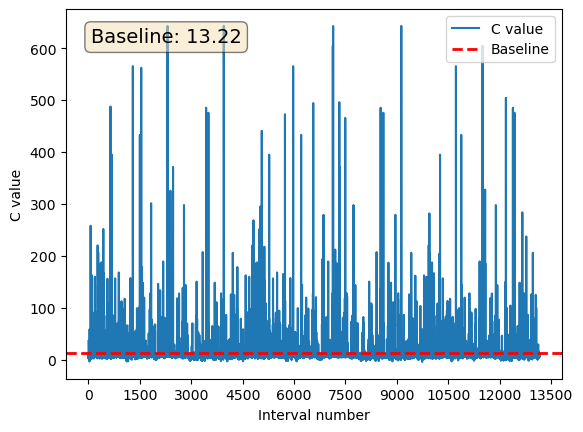

In [313]:
# conver it to nparray
all_data = np.concatenate(all_data)

w1 = 0.6
w2 = 0.6
w3 = 0.2
w4 = 1

C = np.zeros(all_data.shape[0])  # assuming C is a numpy array

for i in range(all_data.shape[0]):
    A = all_data[i, 3]  # nVehEntered over Time
    L = all_data[i, 4]  # nVehLeft over Time
    N = all_data[i, 5]  # nVehsSeen over Time
    S = all_data[i, 6]  # meanSpeed over Time
    T = all_data[i, 7]  # meanTimeLoss over Time
    B = 0.1 * (all_data[i, 1] - all_data[i, 0])  # End-begin

    C[i] = w1 * (A - L) + w2 * (N / (A + L) if A + L != 0 else 0) + w3 * (S / T if T != 0 else 0) + w4 * B

print(C)
# caculate the baseline
baseline = np.mean(C)

# create a new figure
fig, ax = plt.subplots()

# plot the C figure.
ax.plot(range(1, len(C)+1), C, label='C value')

# baseline
ax.axhline(baseline, color='r', linestyle='dashed', linewidth=2, label='Baseline')
ax.legend()

# labels
ax.set_xlabel('Interval number')
ax.set_ylabel('C value')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
textstr = f'Baseline: {baseline:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()


In [314]:
# Training data process
# convert all C into class 1(abnormal) and 0 (normal)
labels = np.where(C > baseline, 1, 0)

# add them to the list
all_data = np.c_[all_data, labels]

# split training set and validation set
X_train, X_test, y_train, y_test = train_test_split(all_data[:, :-1], all_data[:, -1], test_size=0.2, random_state=42)


# model training features
selected_indices = [0, 1, 2, 3, 4, 5, 6, 7]  # they are 'begin', 'end', 'sampledSeconds', 'nVehEntered', 'nVehLeft', 'nVehSeen', 'meanSpeed', 'meanTimeLoss'

# rebuild the input data for LSTM and select the indices the model needs
X_train = np.reshape(X_train[:, selected_indices], (X_train.shape[0], 1, len(selected_indices)))
X_test = np.reshape(X_test[:, selected_indices], (X_test.shape[0], 1, len(selected_indices)))


In [315]:
#I dont think I need put comments here
num_normal_train = np.count_nonzero(y_train == 0)
num_abnormal_train = np.count_nonzero(y_train == 1)

num_normal_test = np.count_nonzero(y_test == 0)
num_abnormal_test = np.count_nonzero(y_test == 1)


print(f"Training set: {num_normal_train} normal, {num_abnormal_train} abnormal")
print(f"Test set: {num_normal_test} normal, {num_abnormal_test} abnormal")


Training set: 9210 normal, 1319 abnormal
Test set: 2316 normal, 317 abnormal


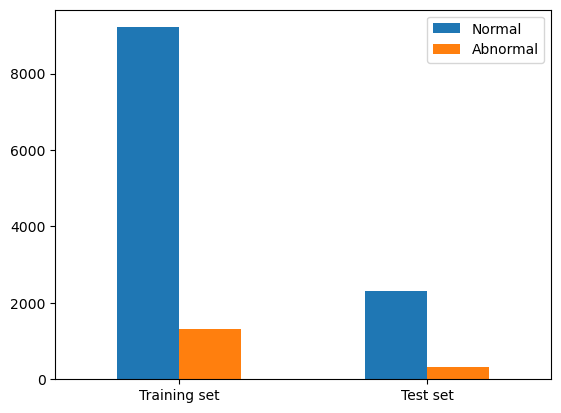

In [11]:
import pandas as pd
# same as above

df = pd.DataFrame({
    'Normal': [num_normal_train, num_normal_test],
    'Abnormal': [num_abnormal_train, num_abnormal_test]
}, index=['Training set', 'Test set'])

df.plot.bar(rot=0)

plt.show()


In [302]:
import pandas as pd

column_names = ['begin', 'end', 'sampledSeconds', 'nVehEntered', 'nVehLeft', 'nVehSeen', 'meanSpeed', 'meanTimeLoss', 'meanOccupancy', 'maxOccupancy', 'meanMaxJamLengthInVehicles', 'meanMaxJamLengthInMeters', 'maxJamLengthInVehicles', 'maxJamLengthInMeters', 'jamLengthInVehiclesSum', 'jamLengthInMetersSum', 'meanHaltingDuration', 'maxHaltingDuration', 'haltingDurationSum', 'meanVehicleNumber', 'maxVehicleNumber', 'C']
df = pd.DataFrame(all_data, columns=column_names)
df.to_csv('D:/Program Files (x86)/Eclipse/Sumo/all_data_11000.csv', index=False)
print("save successful")


save successful


Epoch 1/100
330/330 [==============================] - 7s 6ms/step - loss: 0.3107 - accuracy: 0.8849 - val_loss: 0.2524 - val_accuracy: 0.9062
Epoch 2/100
330/330 [==============================] - 1s 3ms/step - loss: 0.2179 - accuracy: 0.9228 - val_loss: 0.3138 - val_accuracy: 0.8967
Epoch 3/100
330/330 [==============================] - 1s 2ms/step - loss: 0.1956 - accuracy: 0.9335 - val_loss: 0.1460 - val_accuracy: 0.9559
Epoch 4/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9327 - val_loss: 0.2087 - val_accuracy: 0.9305
Epoch 5/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9404 - val_loss: 0.2227 - val_accuracy: 0.9145
Epoch 6/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9413 - val_loss: 0.2078 - val_accuracy: 0.9297
Epoch 7/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1592 - accuracy: 0.9432 - val_loss: 0.1329 - val_accuracy: 0.9597

Epoch 58/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9633 - val_loss: 0.1402 - val_accuracy: 0.9552
Epoch 59/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9663 - val_loss: 0.1860 - val_accuracy: 0.9404
Epoch 60/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9645 - val_loss: 0.1038 - val_accuracy: 0.9727
Epoch 61/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9645 - val_loss: 0.1342 - val_accuracy: 0.9605
Epoch 62/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1254 - accuracy: 0.9653 - val_loss: 0.1074 - val_accuracy: 0.9700
Epoch 63/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1273 - accuracy: 0.9648 - val_loss: 0.1013 - val_accuracy: 0.9776
Epoch 64/100
330/330 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9657 - val_loss: 0.2107 - val_accuracy:

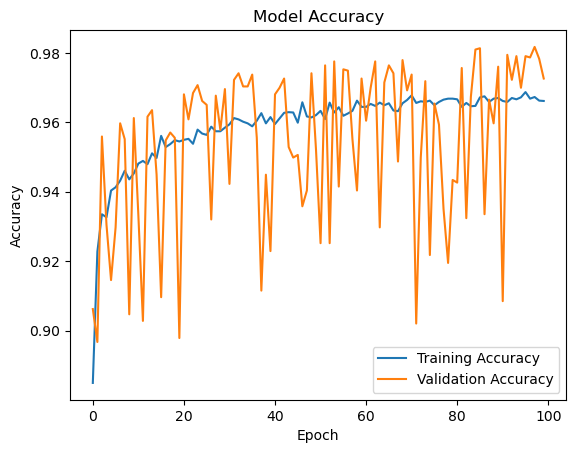

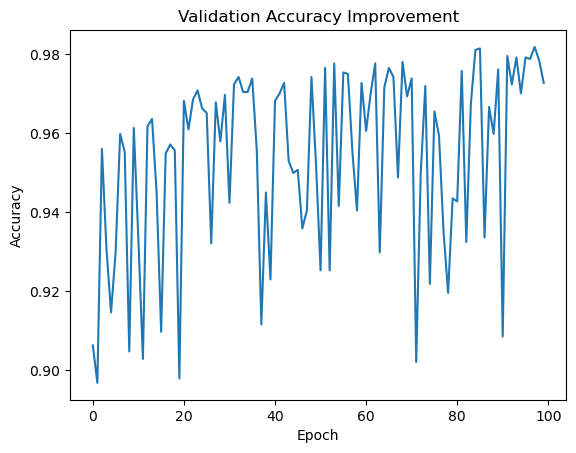

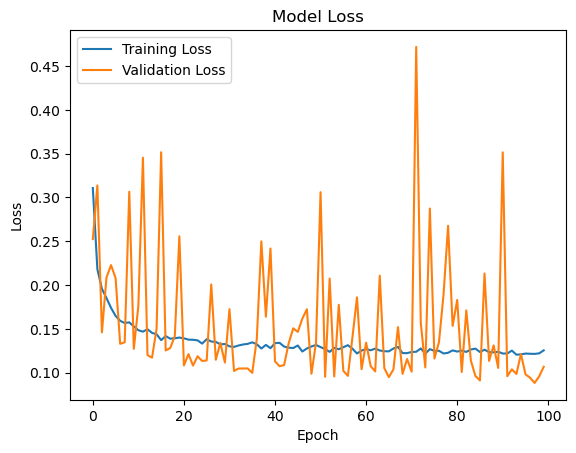

Model Accuracy: 97.27%


In [16]:
#Model Traning of 11000 data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.0001)), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, kernel_regularizer=l2(0.0001))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# model complie, with RMSprop
optimizer = RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# as the name says
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# model training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# traning status
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# validation status
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy Improvement')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# loss status
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# evaluate model.
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1] * 100))
model.save('LSTM-11000-info.h5')



83/83 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2316
         1.0       0.85      0.95      0.90       317

    accuracy                           0.97      2633
   macro avg       0.92      0.96      0.94      2633
weighted avg       0.98      0.97      0.97      2633



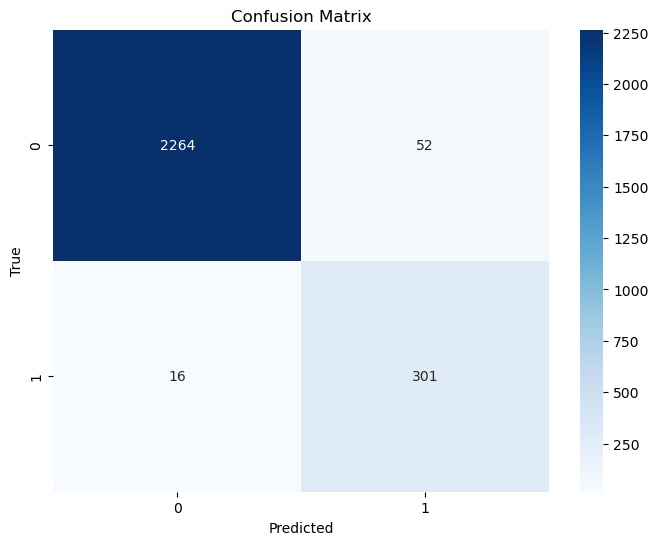

In [14]:
#confusion matrix and figure
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)


cm = confusion_matrix(y_test, y_pred_classes)

report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [316]:
#Here is code for final model
#Over sample the original data

from imblearn.over_sampling import RandomOverSampler

# oversampler
ros = RandomOverSampler(random_state=0)

# convert data from 3d to 2d
X_train_2d = X_train.reshape((X_train.shape[0], -1))

# processing the data
X_resampled, y_resampled = ros.fit_resample(X_train_2d, y_train)

# 2d to 3d
X_resampled = X_resampled.reshape((X_resampled.shape[0], X_train.shape[1], X_train.shape[2]))

# size of data
print(f"Before oversampling, the size of the training set was {X_train.shape[0]}")
print(f"After oversampling, the size of the training set is {X_resampled.shape[0]}")
print(f"The training set has been increased by {X_resampled.shape[0] - X_train.shape[0]} samples")


Before oversampling, the size of the training set was 10529
After oversampling, the size of the training set is 18420
The training set has been increased by 7891 samples


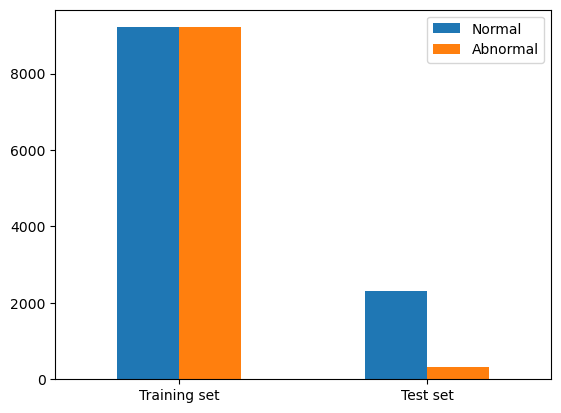

Training set: 9210 normal, 9210 abnormal
Test set: 2316 normal, 317 abnormal


In [34]:
import matplotlib.pyplot as plt
# no comments
num_normal_train = np.sum(y_resampled == 0)
num_abnormal_train = np.sum(y_resampled == 1)

num_normal_test = np.sum(y_test == 0)
num_abnormal_test = np.sum(y_test == 1)

df = pd.DataFrame({
    'Normal': [num_normal_train, num_normal_test],
    'Abnormal': [num_abnormal_train, num_abnormal_test]
}, index=['Training set', 'Test set'])

df.plot.bar(rot=0)

plt.show()
print(f"Training set: {num_normal_train} normal, {num_abnormal_train} abnormal")
print(f"Test set: {num_normal_test} normal, {num_abnormal_test} abnormal")

Epoch 1/100
330/330 [==============================] - 7s 7ms/step - loss: 0.3024 - accuracy: 0.8913 - val_loss: 0.2543 - val_accuracy: 0.8990
Epoch 2/100
330/330 [==============================] - 1s 4ms/step - loss: 0.2200 - accuracy: 0.9177 - val_loss: 0.3172 - val_accuracy: 0.8435
Epoch 3/100
330/330 [==============================] - 1s 4ms/step - loss: 0.1988 - accuracy: 0.9288 - val_loss: 0.2322 - val_accuracy: 0.9214
Epoch 4/100
330/330 [==============================] - 1s 4ms/step - loss: 0.1830 - accuracy: 0.9357 - val_loss: 0.1642 - val_accuracy: 0.9468
Epoch 5/100
330/330 [==============================] - 1s 5ms/step - loss: 0.1767 - accuracy: 0.9373 - val_loss: 0.1433 - val_accuracy: 0.9537
Epoch 6/100
330/330 [==============================] - 1s 4ms/step - loss: 0.1664 - accuracy: 0.9401 - val_loss: 0.1353 - val_accuracy: 0.9582
Epoch 7/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1659 - accuracy: 0.9406 - val_loss: 0.1302 - val_accuracy: 0.9597

Epoch 58/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1276 - accuracy: 0.9639 - val_loss: 0.1269 - val_accuracy: 0.9605
Epoch 59/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1282 - accuracy: 0.9629 - val_loss: 0.0963 - val_accuracy: 0.9753
Epoch 60/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1271 - accuracy: 0.9646 - val_loss: 0.1337 - val_accuracy: 0.9590
Epoch 61/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1280 - accuracy: 0.9624 - val_loss: 0.0943 - val_accuracy: 0.9780
Epoch 62/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1271 - accuracy: 0.9635 - val_loss: 0.1073 - val_accuracy: 0.9768
Epoch 63/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1263 - accuracy: 0.9646 - val_loss: 0.0985 - val_accuracy: 0.9757
Epoch 64/100
330/330 [==============================] - 2s 5ms/step - loss: 0.1255 - accuracy: 0.9656 - val_loss: 0.1029 - val_accuracy:

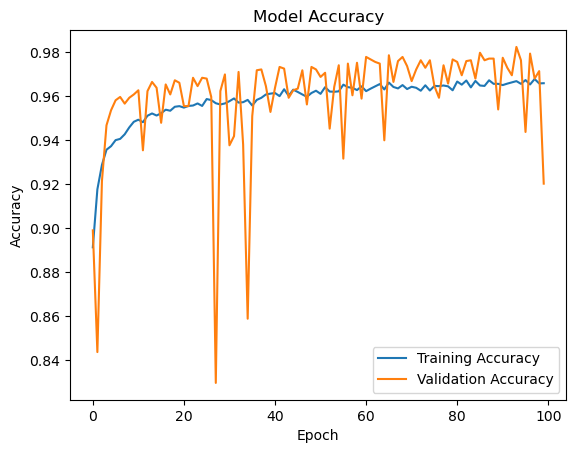

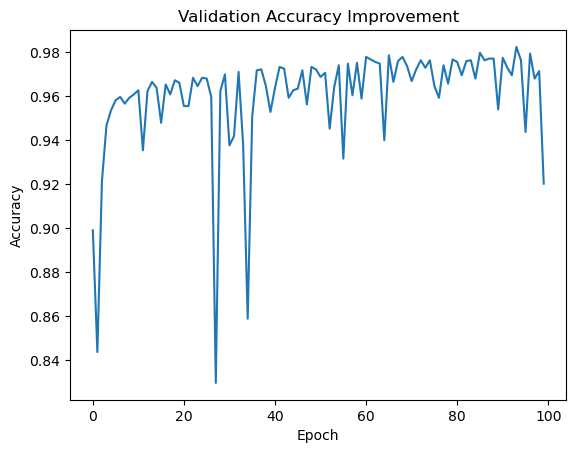

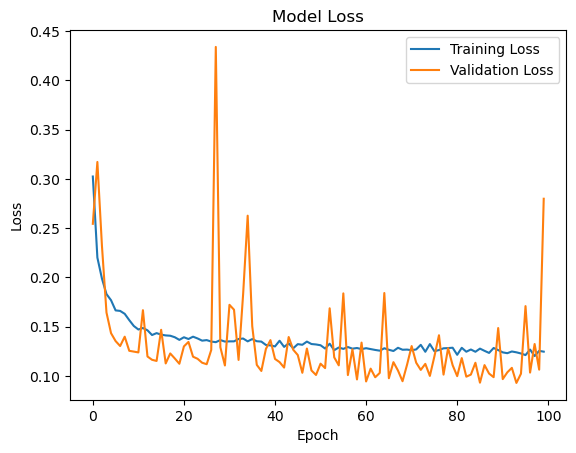

Model Accuracy: 92.02%


In [317]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
import matplotlib.pyplot as plt

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, kernel_regularizer=l2(0.0001)), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, kernel_regularizer=l2(0.0001))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


optimizer = RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy Improvement')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


scores = model.evaluate(X_test, y_test, verbose=0)
print("Model Accuracy: %.2f%%" % (scores[1] * 100))
model.save('LSTM-11000-oversampling-batch32-100-info.h5')


83/83 [==============================] - 1s 1ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2316
         1.0       0.93      0.94      0.94       317

    accuracy                           0.98      2633
   macro avg       0.96      0.96      0.96      2633
weighted avg       0.98      0.98      0.98      2633



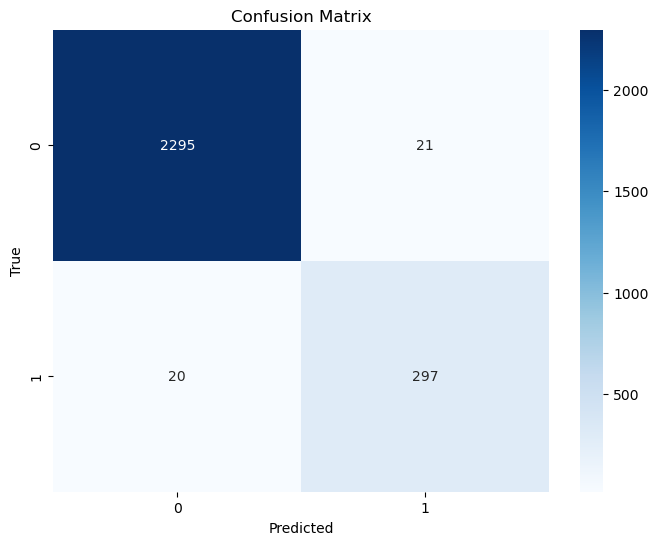

In [44]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred_classes)


report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


42.14252525252525
Top 5 records with highest C values:
[1.170e+03 1.215e+03 3.600e-01 0.000e+00 1.000e+00 1.000e+00 2.415e+01
 1.000e-02]
[1.305e+03 1.350e+03 5.300e-01 0.000e+00 1.000e+00 1.000e+00 2.499e+01
 1.000e-02]
[1.890e+03 1.935e+03 7.600e-01 0.000e+00 1.000e+00 1.000e+00 2.788e+01
 1.000e-02]
[4.500e+01 9.000e+01 2.500e-01 0.000e+00 1.000e+00 1.000e+00 2.804e+01
 1.000e-02]
[8.55e+02 9.00e+02 1.60e+00 2.00e+00 2.00e+00 2.00e+00 3.19e+01 1.00e-02]


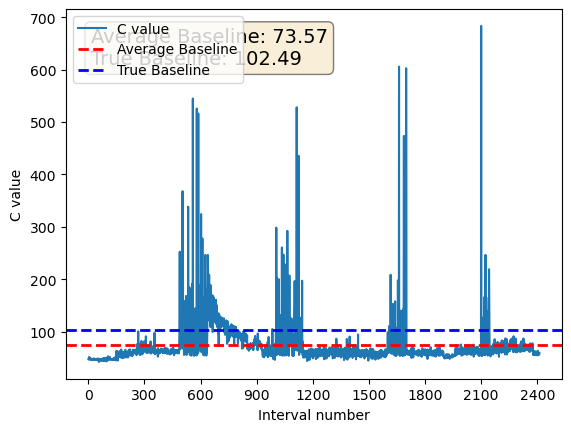

Test set: 2158 normal, 253 abnormal


In [396]:
#here is the codes for the test set.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Read the test set
df = pd.read_csv('D:\\NGSIM数据处理\\NGSIM_Test_Set.csv')

# convert.
all_data = df.values

w1 = 0.6
w2 = 0.6
w3 = 0.2
w4 = 1

C = np.zeros(all_data.shape[0])  # assuming C is a numpy array

for i in range(all_data.shape[0]):
    A = all_data[i, 3]  # nVehEntered over Time
    L = all_data[i, 4]  # nVehLeft over Time
    N = all_data[i, 5]  # nVehsSeen over Time
    S = all_data[i, 6]  # meanSpeed over Time
    T = all_data[i, 7]  # meanTimeLoss over Time
    B = all_data[i, 1] - all_data[i, 0]  # End-begin

    C[i] = w1 * (A - L) + w2 * (N / (A + L) if A + L != 0 else 0) + w3 * (S / T if T != 0 else 0) + w4 * B

# minimum C
min_C = np.min(C)
print(min_C)


# caculate the true base line（13.22 + average and minimum C）
true_baseline = np.mean(C) + min_C - 13.22

# figure for C
fig, ax = plt.subplots()
ax.plot(range(1, len(C)+1), C, label='C value')

# baselines
ax.axhline(np.mean(C), color='r', linestyle='dashed', linewidth=2, label='Average Baseline')
ax.axhline(true_baseline, color='b', linestyle='dashed', linewidth=2, label='True Baseline')

# other stuff
ax.legend()
ax.set_xlabel('Interval number')
ax.set_ylabel('C value')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
textstr = f'Average Baseline: {np.mean(C):.2f}\nTrue Baseline: {true_baseline:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)


plt.show()

# labels for test set
labels = np.where(C > true_baseline, 1, 0)


all_data = np.c_[all_data, labels]


X_test, y_test = all_data[:, :-1], all_data[:, -1]

# reshape the input
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# count
num_normal_test = np.count_nonzero(y_test == 0)
num_abnormal_test = np.count_nonzero(y_test == 1)
print(f"Test set: {num_normal_test} normal, {num_abnormal_test} abnormal")


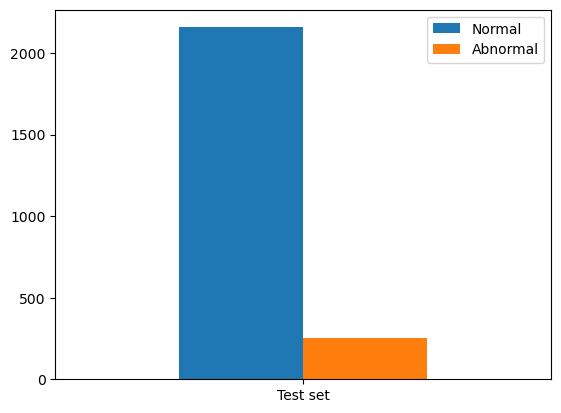

Test set: 2158 normal, 253 abnormal


In [397]:
import matplotlib.pyplot as plt
import pandas as pd

#no comments
num_normal_test = np.count_nonzero(y_test == 0)
num_abnormal_test = np.count_nonzero(y_test == 1)


df = pd.DataFrame({
    'Normal': [num_normal_test],
    'Abnormal': [num_abnormal_test]
}, index=['Test set'])

df.plot.bar(rot=0)

plt.show()

print(f"Test set: {num_normal_test} normal, {num_abnormal_test} abnormal")


In [381]:
print(X_test.shape)

(2411, 1, 8)


In [398]:
from keras.models import load_model

#open the model
#model = load_model('LSTM-11000-oversampling-batch16-new-info.h5')
model = load_model('LSTM-11000-oversampling-batch32-100-info.h5')

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >5 , 1, 0)
y_pred = y_pred.ravel()


accuracy = np.sum(y_pred == y_test) / len(y_test)

print(f"Test accuracy: {accuracy}")


76/76 [==============================] - 1s 1ms/step
Test accuracy: 0.8950642886768976


76/76 [==============================] - 0s 1ms/step
Test accuracy: 0.8950642886768976
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      2158
         1.0       0.48      0.63      0.55       253

    accuracy                           0.89      2411
   macro avg       0.72      0.77      0.74      2411
weighted avg       0.91      0.89      0.90      2411



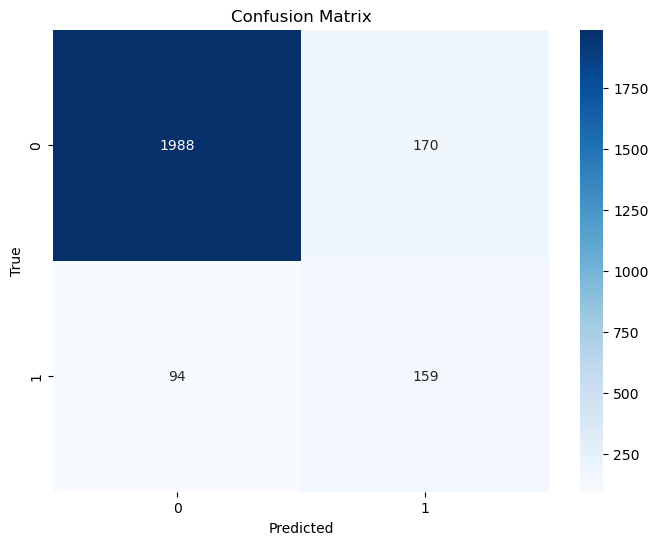

Confusion Matrix:
         Class 0  Class 1
Class 0     1988      170
Class 1       94      159


In [399]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()  # flatten the array
print(f"Test accuracy: {accuracy}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# same as name
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)

# figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# text
confusion_matrix_text = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])

# text
print("Confusion Matrix:")
print(confusion_matrix_text)



In [ ]:
# That's everything.